In [2]:
!pip install  gdown

In [3]:
!gdown --id 13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36
To: /kaggle/working/FinalDataset-V1-t1.tar
100%|███████████████████████████████████████| 95.4M/95.4M [00:00<00:00, 216MB/s]


In [4]:
!tar -xvf "FinalDataset-V1-t1.tar" -C "/kaggle/working"

content/drive/MyDrive/Final Dataset- V1/
content/drive/MyDrive/Final Dataset- V1/Normal/
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation0-0.02 346.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 097.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 101.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 113.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 068.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 050.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 053.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 079.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 099.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 029.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 105.

### Importing Libraries

In [5]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=44de36ad5ff917f6d420cd60154a8f89fcdcfd32c4288a2944cc97a355c98a94
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [6]:
import matplotlib
import tensorflow as tf
from tqdm import tqdm
#matplotlib.use("Agg")
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from skimage import color, io
from tensorflow.keras import layers, Model, utils 
from skimage import color, io
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from io import BytesIO
import time
import keras
from imutils import paths
import shutil
import itertools
import pandas as pd
from keras import models
from IPython.display import Image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential 
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Activation, Dense, Flatten, RepeatVector, Dropout,GlobalAveragePooling2D,GlobalMaxPooling2D

### creating the dataset into correct format

In [7]:
IMG_PATH_BASE = "/kaggle/working/content/drive/MyDrive/Final Dataset- V1"
IMG_PATH_NORMAL = IMG_PATH_BASE+'/Normal'
IMG_PATH_ANOMALY = IMG_PATH_BASE+'/Anomaly'

test = os.listdir(IMG_PATH_BASE)
print(test)

print("[INFO] loading images...")
imagePaths_base = list(paths.list_images(IMG_PATH_BASE))
imagePaths_normal = list(paths.list_images(IMG_PATH_NORMAL))
imagePaths_anomaly = list(paths.list_images(IMG_PATH_ANOMALY))


print(len(imagePaths_base))
print("Number of data in the normal class")
print(len(imagePaths_normal))
print("Number of data in the anomaly class")
print(len(imagePaths_anomaly))

['Normal', 'Anomaly']
[INFO] loading images...
2511
Number of data in the normal class
2012
Number of data in the anomaly class
499


#### Preprocessing Untility methods


In [8]:
def croppingImage(img):
    x=0
    w=325
    y=0
    h=640
    return img[x:w,y:h]

In [9]:
def normalizeImage(img):
    return cv2.normalize(img,None,alpha=0,beta=255,norm_type=cv2.NORM_INF)
 

In [10]:
dataset = []
labels = []

In [11]:
for imgP in tqdm(imagePaths_normal):
    
    image_normal = cv2.imread(imgP)
    #print(image_normal.shape)
    image_normal =  croppingImage(image_normal)
    image_normal = cv2.resize(image_normal, (229, 229),interpolation = cv2.INTER_CUBIC)
    image_normal = image.img_to_array(image_normal)
    #image_normal = np.expand_dims(image_normal, axis=0)
    image_normal /= 255.
    #image_normal = normalizeImage(image_normal)
    #image = cv2.resize(image, (224, 224))
   
    #print(image_normal)
    dataset.append(image_normal)
  
    labels.append(0) 

    
print(labels)

100%|██████████| 2012/2012 [00:07<00:00, 252.26it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
for imgP in tqdm(imagePaths_anomaly):
    
    image_anomaly = cv2.imread(imgP)
    image_anomaly = croppingImage(image_anomaly)
   
    image_anomaly = cv2.resize(image_anomaly, (229, 229),interpolation = cv2.INTER_CUBIC)
    #print(image_anomaly.shape)
    #i=i+1
    image_anomaly = image.img_to_array(image_anomaly)
    #image_normal = np.expand_dims(image_normal, axis=0)
    image_anomaly /= 255.
    #image_anomaly = normalizeImage(image_anomaly)
    #np.append(dataset,image_anomaly)
    dataset.append(image_anomaly)
    #plt.imshow(image_anomaly)
    #plt.title('anomaly '+str(i),fontweight ="bold")
    #plt.show()
    #Image(filename=image) 
    labels.append(1) 
    #np.append(labels,1)
    
#print(labels[2500])

100%|██████████| 499/499 [00:02<00:00, 229.67it/s]


In [13]:
dataset =  np.asarray(dataset)

In [14]:
labels =  np.asarray(labels)

### Image Preprocessing Part

#### crop function

## Defining the Feature Extractor and making the CNN classifier

In [15]:
base_model_inceptionV3 = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(229, 229,3))
base_model_inceptionV3.trainable = False
output = GlobalMaxPooling2D()(base_model_inceptionV3.output)
inceptionV3_model =  Model(inputs = base_model_inceptionV3.inputs,outputs=output)



model = Sequential()
model.add(inceptionV3_model)
model.add(Dense(512, activation='relu', input_dim=(None,2048)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))



87910968/87910968 [==============================] - 1s 0us/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 22,852,385
Trainable params: 1,049,601
Non-trainable params: 21,802,784
_________________________________________________________________


for data in tqdm(dataset):
  
  x = np.expand_dims(data, axis=0) 
  x = preprocess_input(x) 
  #print(x.shape)
  print(data.shape)
  features = model.predict(x) 

  print(features.shape)
  features_reduce = features.squeeze() 
  #print(features_reduce)
  #resnet_features.write(' '.join(str(x) for x in features_reduce) + '\n')

In [17]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight ='balanced', 
                               classes= np.unique(labels),
                               y= labels)


                               
                               
cw = dict(zip( np.unique(labels), weights))
print(cw)

{0: 0.6240059642147118, 1: 2.5160320641282565}


model.add(model)
add_model.add(GlobalAveragePooling2D())

#model.add(Dense(512, activation='relu', input_dim=(None,2048)))
model.add(Dropout(0.3))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [18]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
history = model.fit(dataset, labels, batch_size=10, class_weight=cw,epochs=3) 

Epoch 1/3
252/252 [==============================] - 21s 31ms/step - loss: 0.0166 - accuracy: 0.9968
Epoch 2/3
252/252 [==============================] - 7s 29ms/step - loss: 8.5363e-10 - accuracy: 1.0000
Epoch 3/3
252/252 [==============================] - 7s 28ms/step - loss: 7.3881e-10 - accuracy: 1.0000


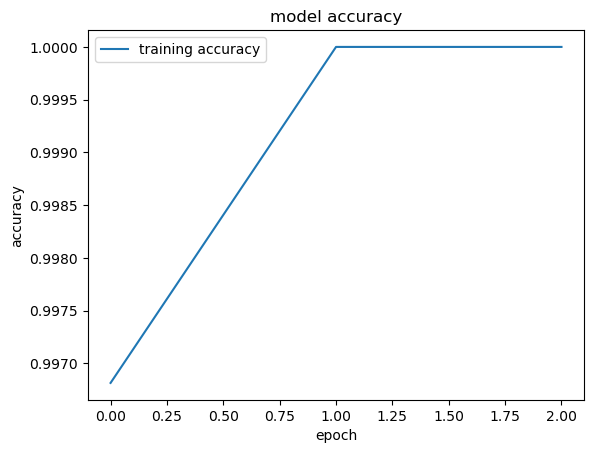

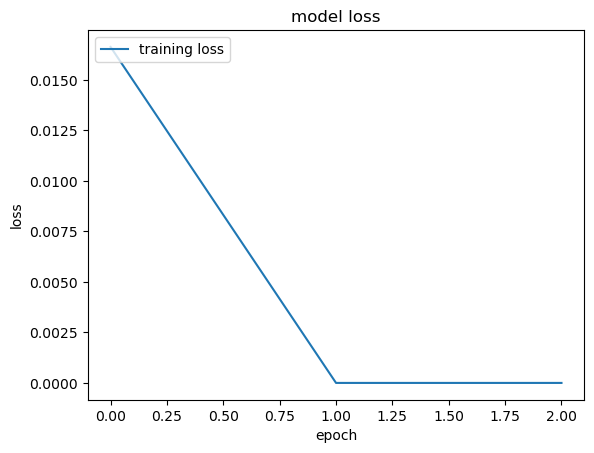

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'testing accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')

In [21]:
model.save('model')


In [22]:
model2 = keras.models.load_model("model")

In [23]:
predX=model2.predict(dataset)
# predictions for the data (2500 images)
trure_targets =  labels

#confusion_matrix(trure_targets, predX)

79/79 [==============================] - 9s 78ms/step


In [24]:
print(predX)

[[5.8528431e-19]
 [5.8616049e-18]
 [2.9009175e-19]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]]


In [25]:
#predictions = np.empty(predX.shape
predictions =[]

In [26]:
for pred in predX:
    #print(pred.shape)
    
    if(pred<0.5):
        predictions.append(0)
    else:
        predictions.append(1)

In [27]:
predictions =  np.asarray(predictions)
print(predictions.shape)
print(predictions[2000])
print(labels[2000])

print(predictions[2012])
print(labels[2012])

(2511,)
0
0
1
1


In [28]:
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
from sklearn.metrics import confusion_matrix
    
data = confusion_matrix(labels, predictions,labels=[0,1])

In [30]:
df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
df

,Predicted_Normal,Predicted_Anomaly
Actual_Normal,2012,0
Actual_Anomaly,0,499


<Axes: >

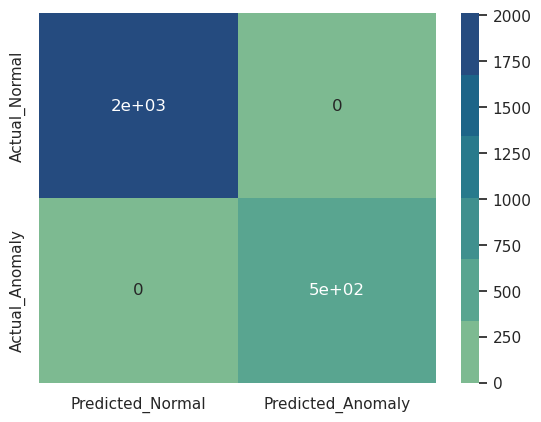

In [31]:
import seaborn as sns

sns.set()
colorMap = sns.color_palette("crest")  

sns.heatmap(df, annot=True,cmap=colorMap)

### LIME Explainations

In [32]:
!pip install lime

In [33]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [34]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()
lime_explainer = lime_image.LimeImageExplainer()

#explanation = lime_explainer.explain_instance(trainX[1400].astype('double'), model.predict,  
                                         #top_labels=2, hide_color=0, num_samples=1000)
    



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


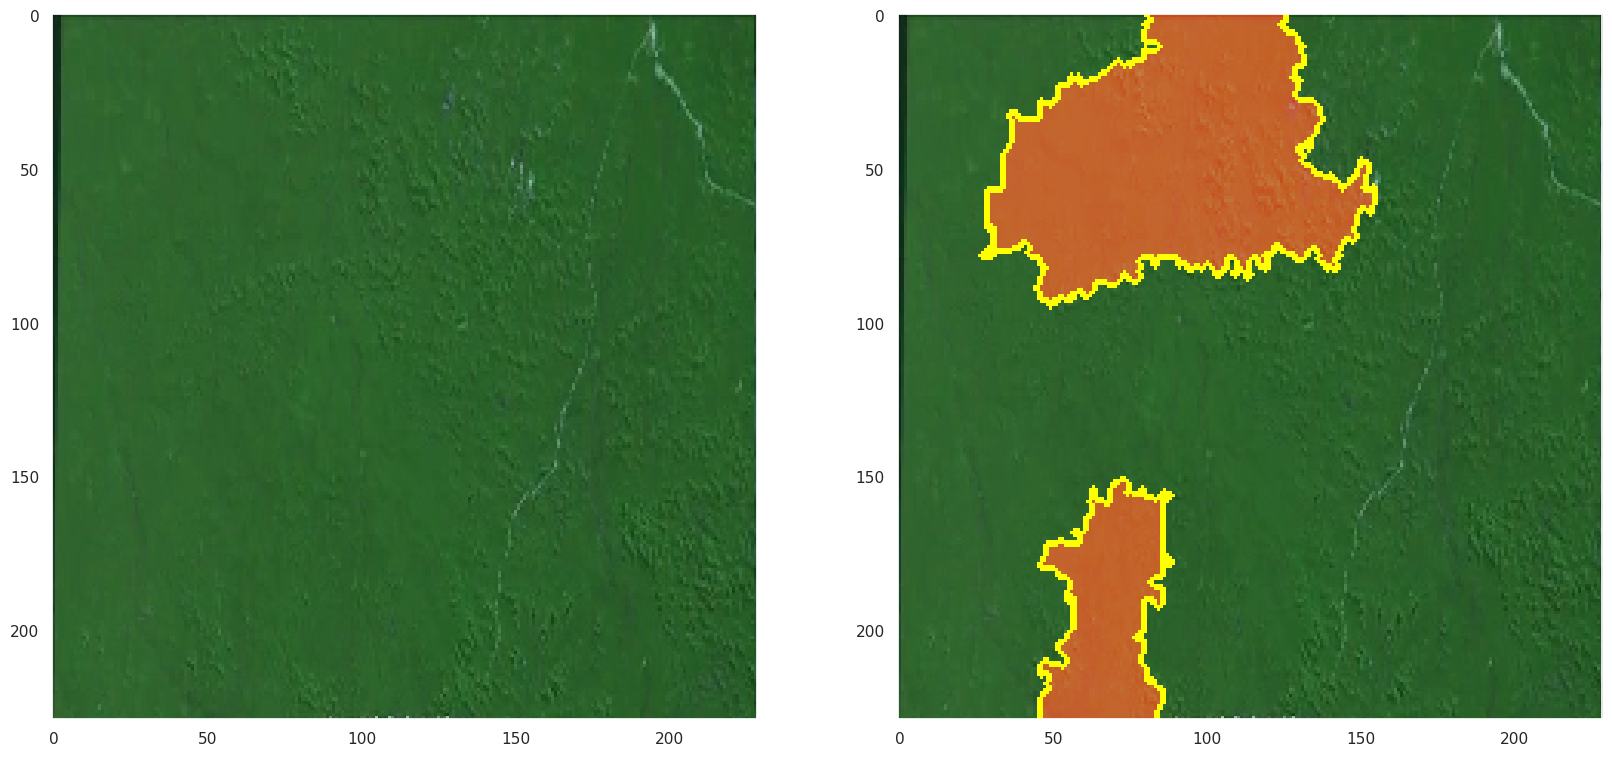

In [35]:
#100th
explanation = explainer.explain_instance(dataset[99],model.predict,top_labels=2)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[99])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

In [36]:
print(explanation.top_labels)

[0]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step
0


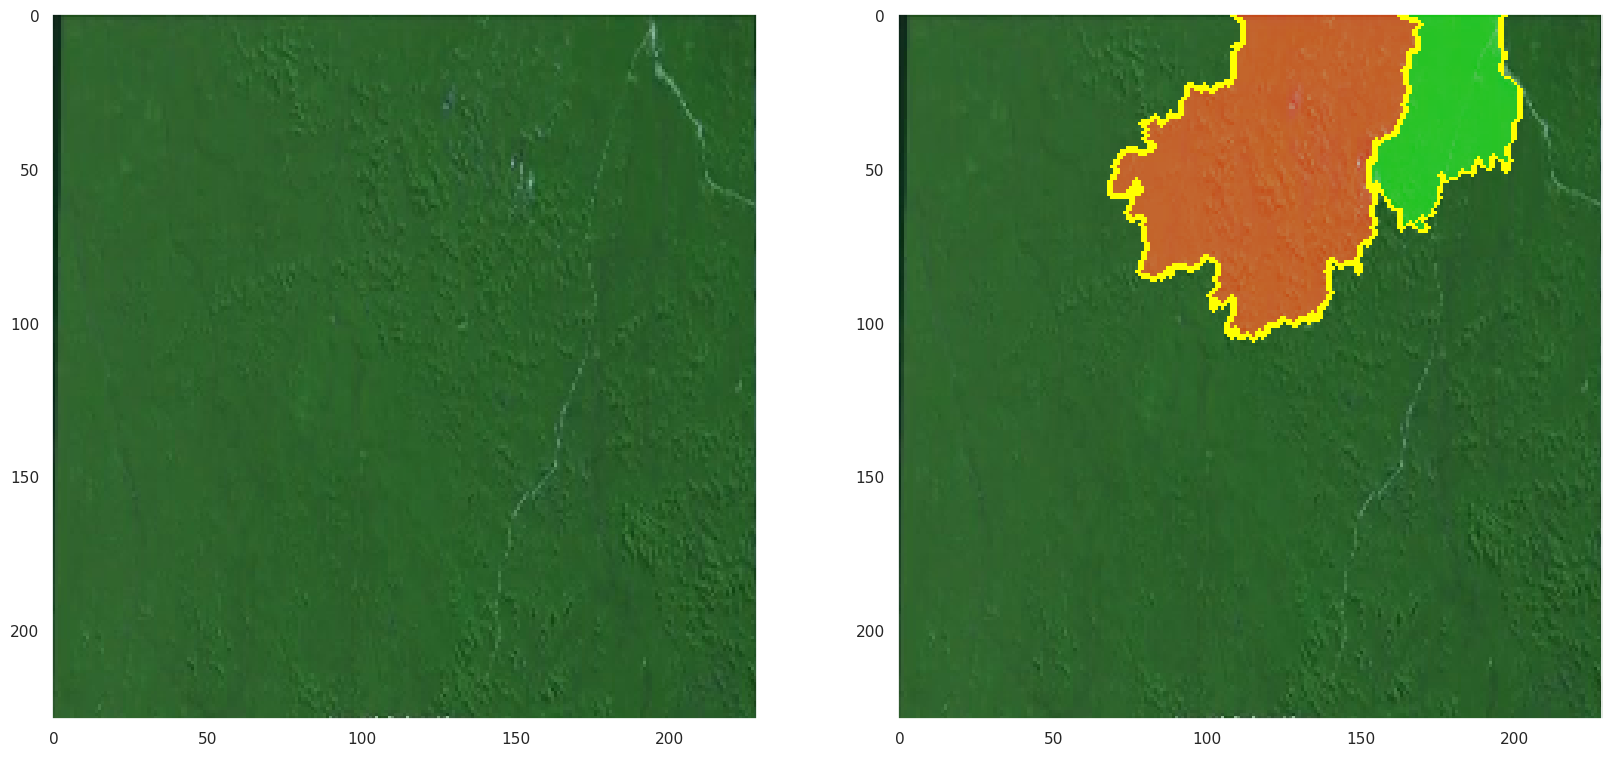

In [37]:
#1900th
explanation = explainer.explain_instance(
         
         dataset[1899], 
         model.predict
)
print(explanation.top_labels[0])
image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[1899])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


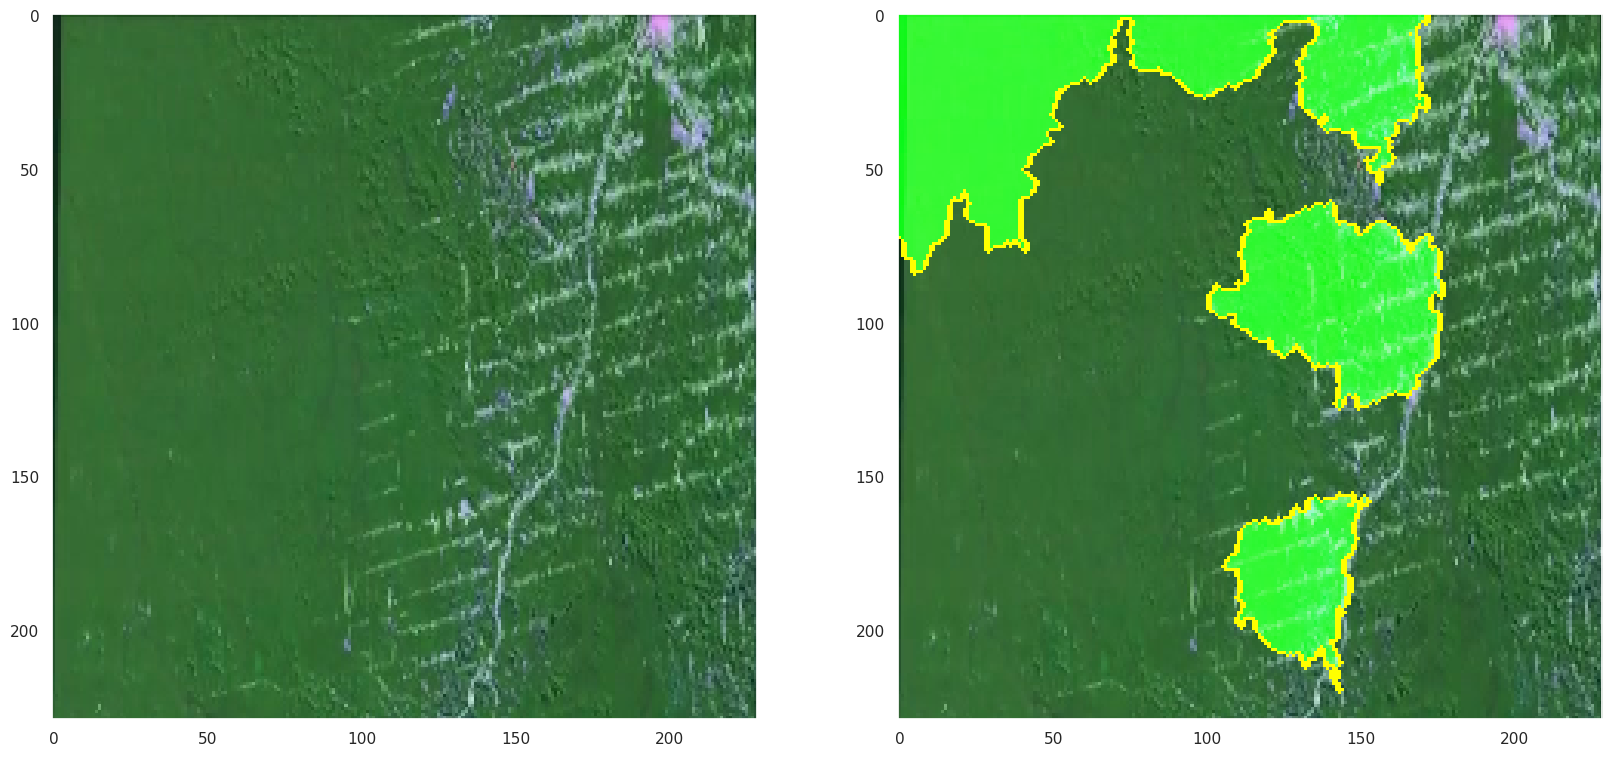

In [38]:
#2250th
explanation = explainer.explain_instance(
         dataset[2249], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2249])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


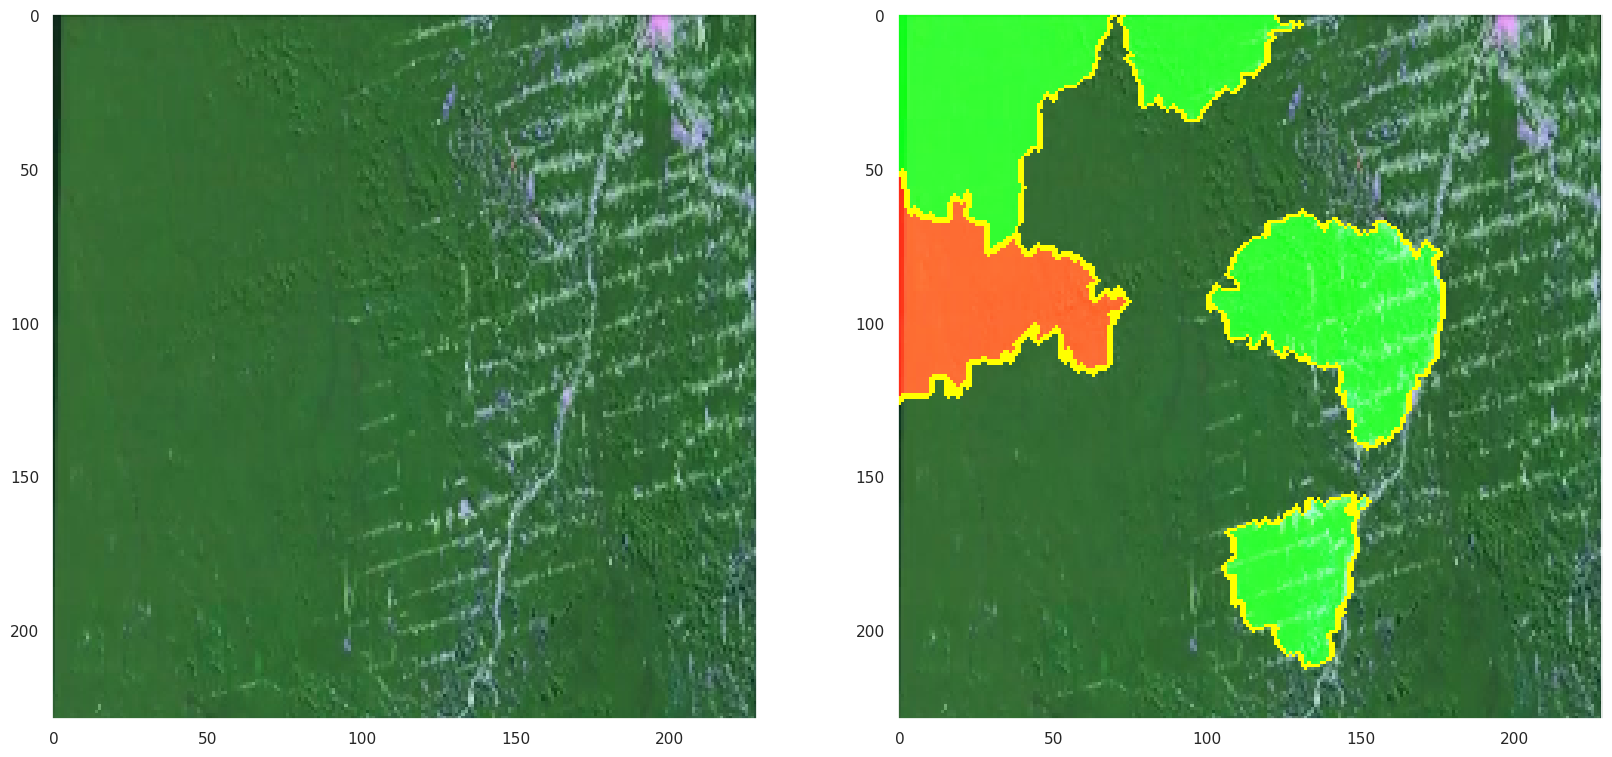

In [39]:
#2450th
explanation = explainer.explain_instance(
         dataset[2449], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2449])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

In [40]:
!pwd

/kaggle/working


### SHAP Explanations

In [41]:
!pip install shap

In [42]:
class_names = {
    0:'Normal',
    1:'Anomaly'
}
num_classes = len(class_names)

In [43]:
class_names = np.vectorize(class_names)
print(class_names)

In [44]:
import shap

class_names = ['Normal','Anomaly']

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)
 
# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur, output_names=class_names)
print(explainer_blur) 
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[0:1], max_evals=5000, batch_size=50)

shap.explainers.Partition()


  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:42, 42.16s/it]               


In [45]:
print("SHAP VALues",shap_values_fine.shape)

SHAP VALues (1, 229, 229, 3, 1)


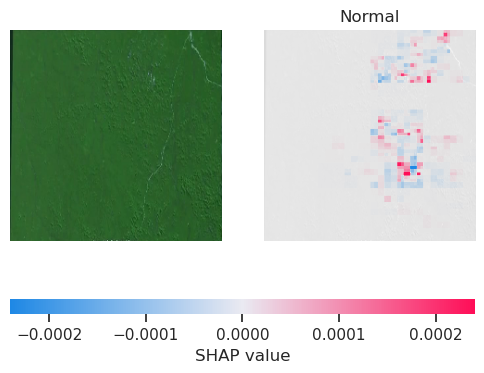

In [46]:
shap.image_plot(shap_values_fine,dataset[0:1],[["Normal"]])

# 100th image

In [47]:
class_names = ['Normal','Anomaly']

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)
 
# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur, output_names=class_names)
print(explainer_blur) 
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[100:101], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

shap.explainers.Partition()


  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:33, 33.27s/it]               


In [48]:
shap_values_fine.shape

(1, 229, 229, 3, 1)

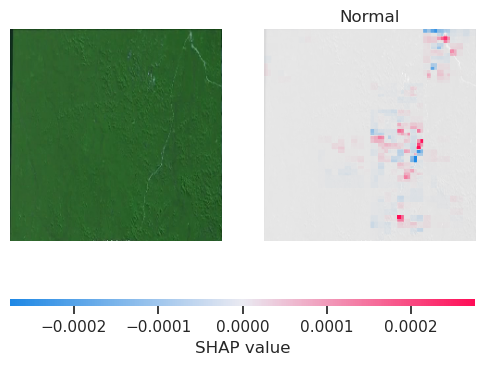

In [49]:
test=shap.image_plot(shap_values_fine,dataset[100:101],[["Normal"]],aspect=0.1)

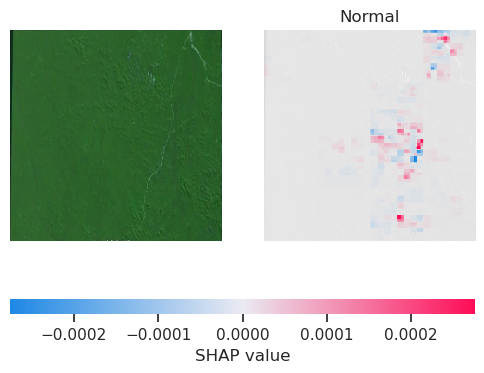

In [50]:
shap.image_plot(shap_values_fine[0],dataset[103],[["Normal"]])

# 1900

In [51]:
class_names = ['Normal','Anomaly']

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)
 
# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur, output_names=class_names)
print(explainer_blur) 
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[1899:1900], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:2])

shap.explainers.Partition()


  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:34, 34.55s/it]               


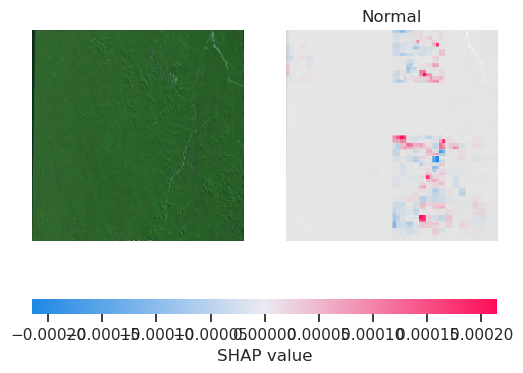

In [52]:
shap.image_plot(shap_values_fine,dataset[1899:1900],[["Normal"]])

# 2250

In [53]:
class_names = ['Normal','Anomaly']

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)
 
# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur, output_names=class_names)
print(explainer_blur) 
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2250:2251], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:2])

shap.explainers.Partition()


  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:32, 32.59s/it]               


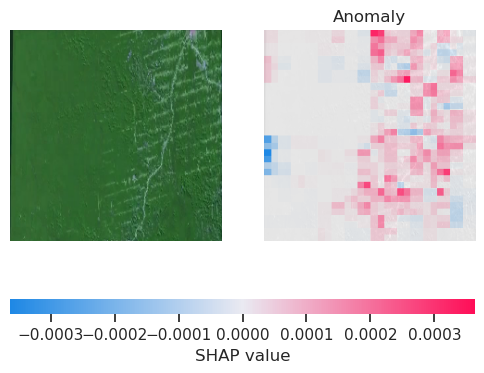

In [54]:
shap.image_plot(shap_values_fine,dataset[2250:2251],[["Anomaly"]])

# 2450

In [55]:
class_names = ['Normal','Anomaly']

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)
 
# create an explainer with model and image masker
explainer_blur = shap.Explainer(model, masker_blur, output_names=class_names)
print(explainer_blur) 
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2450:2451], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[0:2])

shap.explainers.Partition()


  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:32, 32.89s/it]               


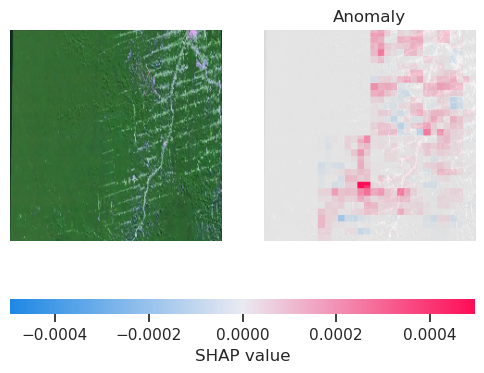

In [56]:
shap.image_plot(shap_values_fine,dataset[2450:2451],[ ["Anomaly"]])

# !mkdir LIME 

for x in range(0,2500):
    explanation = lime_explainer.explain_instance(
         dataset[x], 
         model.predict)

    image, mask = explanation.get_image_and_mask(
             explanation.top_labels[0],
             positive_only=False, 
             hide_rest=False)
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.imshow(dataset[x])
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(image, mask))
    plt.savefig('/kaggle/working/LIME/{x+1}')
    

